In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
ts_hc = np.load('ts_hc.npy')
ts_schz = np.load('ts_schz.npy')

In [4]:
ts_hc = ts_hc.reshape(52,142*118)

In [5]:
ts_schz = ts_schz.reshape(50,142*118)

In [6]:
X = np.append(ts_hc,ts_schz,axis=0)

In [7]:
X.shape

(102, 16756)

In [8]:
X[0].shape

(16756,)

In [9]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [10]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [12]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [13]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [14]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [15]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.567857 (0.190531)
SVM: 0.731964 (0.105599)
KNN: 0.700417 (0.080373)
LR: 0.688750 (0.143604)
MLP: 0.635179 (0.163971)
RF: 0.631905 (0.105488)
ET: 0.682679 (0.075463)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957773, p:0.018892
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.794373, p:0.114611
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

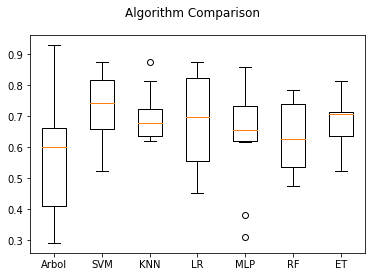

In [16]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.550000 (0.257013)
SVM: 0.710000 (0.244972)
KNN: 0.695000 (0.177959)
LR: 0.635714 (0.236914)
MLP: 0.579643 (0.254781)
RF: 0.608810 (0.238813)
ET: 0.673333 (0.251573)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.920205, p:0.000269
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.282079, p:0.943371
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

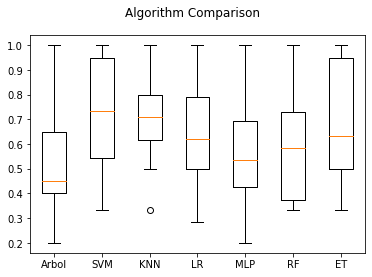

In [17]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.549405 (0.259322)
SVM: 0.683333 (0.221774)
KNN: 0.624405 (0.147457)
LR: 0.728571 (0.186552)
MLP: 0.704167 (0.230413)
RF: 0.569048 (0.214867)
ET: 0.617262 (0.203778)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.944091, p:0.003600
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.624577, p:0.709917
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

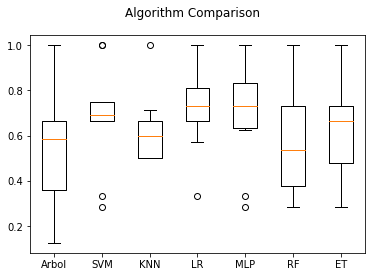

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.537273 (0.187962)
SVM: 0.694545 (0.106964)
KNN: 0.694545 (0.058663)
LR: 0.667273 (0.124063)
MLP: 0.597273 (0.145798)
RF: 0.598182 (0.080165)
ET: 0.636364 (0.066556)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.926431, p:0.000511
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.231659, p:0.051391
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

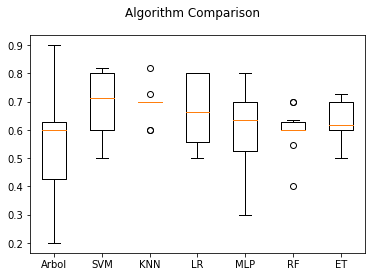

In [19]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 2 components

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
pca.fit(X)

PCA(n_components=2)

In [23]:
X_pca2 = pca.transform(X)

In [24]:
X_pca2.shape

(102, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.647679 (0.171935)
SVM: 0.582202 (0.118734)
KNN: 0.659821 (0.181806)
LR: 0.551012 (0.203379)
MLP: 0.579464 (0.157424)
RF: 0.627024 (0.096707)
ET: 0.653095 (0.117072)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.987646, p:0.724301
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.731397, p:0.128321
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

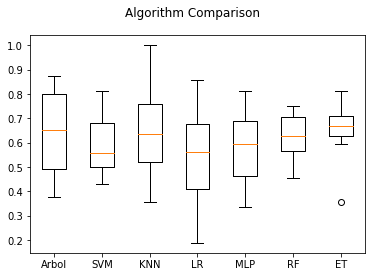

In [25]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.604881 (0.251685)
SVM: 0.560476 (0.229414)
KNN: 0.668214 (0.263775)
LR: 0.545833 (0.220456)
MLP: 0.547500 (0.316536)
RF: 0.591667 (0.218486)
ET: 0.649167 (0.172016)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.946500, p:0.004775
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.826600, p:0.553713
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

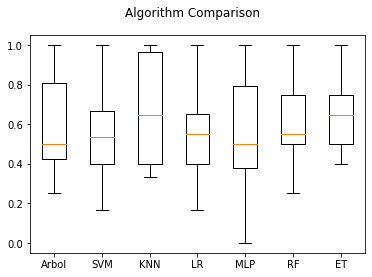

In [26]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.648810 (0.217453)
SVM: 0.636310 (0.106959)
KNN: 0.665476 (0.163616)
LR: 0.568452 (0.239863)
MLP: 0.549405 (0.286359)
RF: 0.628571 (0.177840)
ET: 0.694643 (0.163881)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.949960, p:0.007216
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.831180, p:0.550324
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

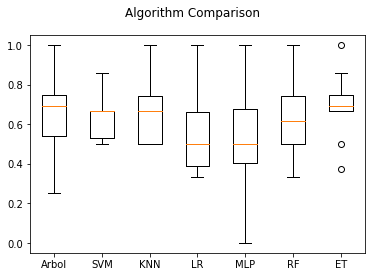

In [27]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.638182 (0.155813)
SVM: 0.588182 (0.096385)
KNN: 0.676364 (0.154663)
LR: 0.528182 (0.155794)
MLP: 0.547273 (0.114618)
RF: 0.597273 (0.070071)
ET: 0.646364 (0.092750)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.963359, p:0.038478
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.459281, p:0.206750
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

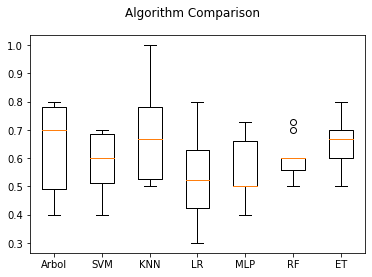

In [28]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 10 components

In [29]:
pca = PCA(n_components=10)

In [30]:
pca.fit(X)

PCA(n_components=10)

In [31]:
X_pca10 = pca.transform(X)

In [32]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.621667 (0.170884)
SVM: 0.687976 (0.156379)
KNN: 0.586488 (0.135158)
LR: 0.704524 (0.095990)
MLP: 0.645298 (0.109043)
RF: 0.609881 (0.183304)
ET: 0.614464 (0.146508)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.983770, p:0.500861
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.603690, p:0.726336
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

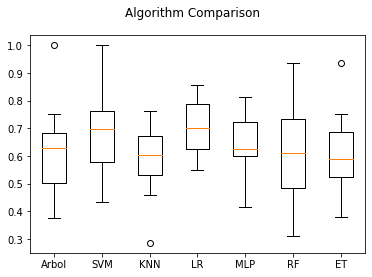

In [33]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.675000 (0.275000)
SVM: 0.676310 (0.193267)
KNN: 0.543056 (0.191560)
LR: 0.681548 (0.162523)
MLP: 0.597738 (0.289919)
RF: 0.600000 (0.240947)
ET: 0.615556 (0.181690)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.959895, p:0.024703
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.775617, p:0.592056
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

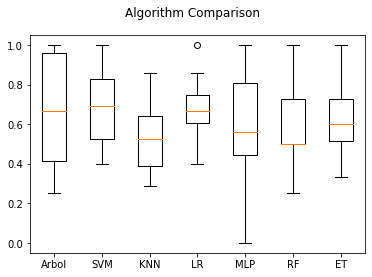

In [34]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.541667 (0.216866)
SVM: 0.757738 (0.183890)
KNN: 0.817857 (0.140965)
LR: 0.755952 (0.158136)
MLP: 0.627381 (0.330174)
RF: 0.573214 (0.263362)
ET: 0.619048 (0.256933)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.935252, p:0.001321
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.402566, p:0.037355
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

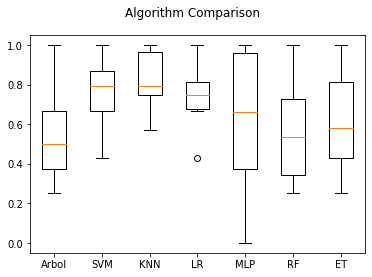

In [35]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.623636 (0.183231)
SVM: 0.695455 (0.161258)
KNN: 0.558182 (0.129155)
LR: 0.705455 (0.088158)
MLP: 0.637273 (0.076650)
RF: 0.576364 (0.164653)
ET: 0.585455 (0.147104)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.956488, p:0.016083
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.203109, p:0.316526
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

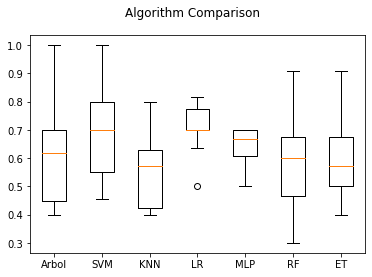

In [36]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [37]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [38]:
pca = PCA(n_components=100)

In [39]:
pca.fit(X)

PCA(n_components=100)

In [40]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.494345 (0.188318)
SVM: 0.731964 (0.105599)
KNN: 0.709940 (0.088291)
LR: 0.710000 (0.137790)
MLP: 0.512857 (0.154670)
RF: 0.603393 (0.184920)
ET: 0.543155 (0.163670)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948293, p:0.005908
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.014641, p:0.424025
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

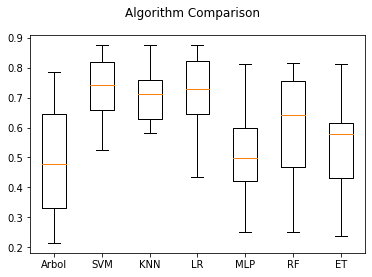

In [41]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.530833 (0.324638)
SVM: 0.710000 (0.244972)
KNN: 0.748333 (0.215052)
LR: 0.663333 (0.256233)
MLP: 0.487262 (0.276791)
RF: 0.630952 (0.366736)
ET: 0.609524 (0.333027)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.898640, p:0.000034
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.994544, p:0.436869
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

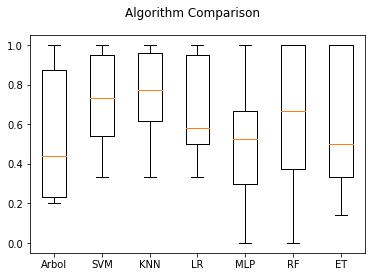

In [42]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.445833 (0.181610)
SVM: 0.683333 (0.221774)
KNN: 0.595833 (0.179214)
LR: 0.711905 (0.183874)
MLP: 0.580357 (0.285109)
RF: 0.498810 (0.322988)
ET: 0.436905 (0.258202)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.960854, p:0.027913
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.027619, p:0.415869
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

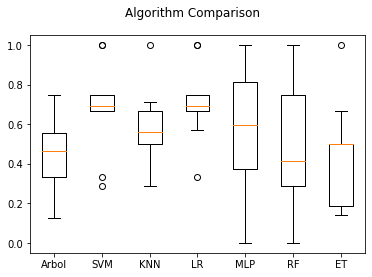

In [43]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.467273 (0.168228)
SVM: 0.694545 (0.106964)
KNN: 0.694545 (0.097166)
LR: 0.678182 (0.107811)
MLP: 0.510000 (0.103049)
RF: 0.524545 (0.172299)
ET: 0.465455 (0.164734)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939407, p:0.002102
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.280320, p:0.279223
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

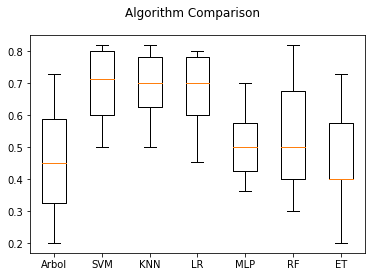

In [44]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [45]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [46]:
from sklearn.manifold import TSNE

In [47]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.489167 (0.179218)
SVM: 0.559048 (0.142249)
KNN: 0.450655 (0.134957)
LR: 0.429821 (0.129595)
MLP: 0.489107 (0.118809)
RF: 0.426786 (0.143730)
ET: 0.510179 (0.068552)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.990169, p:0.862662
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.929661, p:0.480076
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

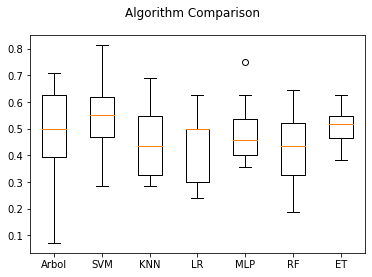

In [48]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.505000 (0.228771)
SVM: 0.543214 (0.240410)
KNN: 0.424762 (0.302662)
LR: 0.209444 (0.172098)
MLP: 0.350000 (0.317668)
RF: 0.440357 (0.253122)
ET: 0.361667 (0.252589)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.948520, p:0.006070
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.706584, p:0.645426
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

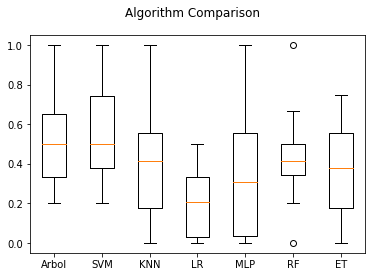

In [49]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.407143 (0.168089)
SVM: 0.568452 (0.153596)
KNN: 0.432738 (0.226817)
LR: 0.305952 (0.270217)
MLP: 0.339286 (0.314216)
RF: 0.402381 (0.223023)
ET: 0.466667 (0.265975)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.935838, p:0.001409
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.353698, p:0.247234
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

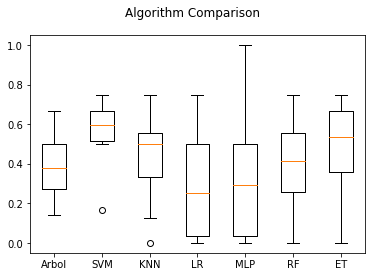

In [50]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.488182 (0.179533)
SVM: 0.538182 (0.117958)
KNN: 0.422727 (0.135650)
LR: 0.343636 (0.150250)
MLP: 0.421818 (0.118126)
RF: 0.410909 (0.105298)
ET: 0.459091 (0.108350)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.963645, p:0.039923
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.732153, p:0.625504
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

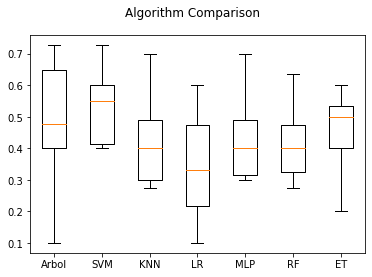

In [51]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [52]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.404940 (0.145833)
SVM: 0.529821 (0.136395)
KNN: 0.471548 (0.164088)
LR: 0.493988 (0.179367)
MLP: 0.403631 (0.096836)
RF: 0.511250 (0.111118)
ET: 0.540833 (0.126692)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.980632, p:0.351161
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.786113, p:0.584076
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

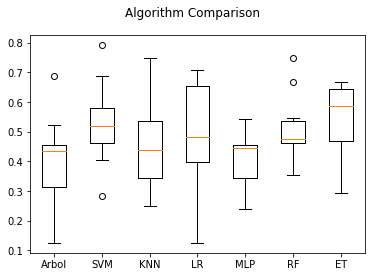

In [53]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.414048 (0.289037)
SVM: 0.527976 (0.289093)
KNN: 0.361071 (0.318447)
LR: 0.506667 (0.256385)
MLP: 0.275000 (0.223762)
RF: 0.461667 (0.299384)
ET: 0.491786 (0.329098)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.936375, p:0.001496
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.348248, p:0.908338
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

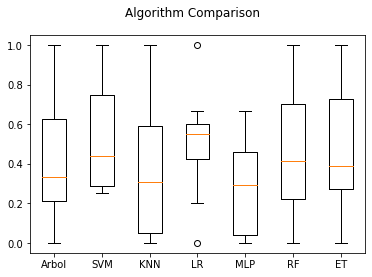

In [54]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.366071 (0.185906)
SVM: 0.466071 (0.312169)
KNN: 0.374405 (0.345755)
LR: 0.445833 (0.240795)
MLP: 0.247619 (0.198335)
RF: 0.413095 (0.219645)
ET: 0.446429 (0.303011)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943798, p:0.003479
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.206874, p:0.314617
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

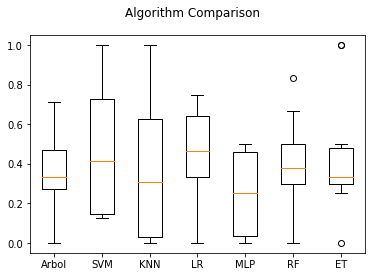

In [55]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.405455 (0.127869)
SVM: 0.451818 (0.155082)
KNN: 0.431818 (0.180048)
LR: 0.483636 (0.173386)
MLP: 0.420000 (0.126543)
RF: 0.491818 (0.094864)
ET: 0.453636 (0.140979)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.960704, p:0.027382
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.556619, p:0.763019
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

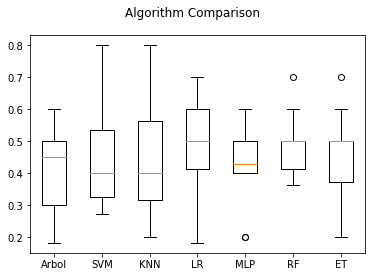

In [56]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [57]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [58]:
from umap import UMAP

In [59]:
reducer = UMAP()

In [60]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.707560 (0.118781)
SVM: 0.756786 (0.134237)
KNN: 0.776310 (0.139304)
LR: 0.743393 (0.130339)
MLP: 0.700238 (0.160151)
RF: 0.729226 (0.137964)
ET: 0.773036 (0.123373)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957636, p:0.018570
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.115418, p:0.994265
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

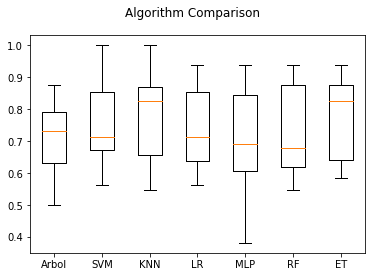

In [61]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.743333 (0.182909)
SVM: 0.789762 (0.208545)
KNN: 0.818333 (0.218130)
LR: 0.739762 (0.212055)
MLP: 0.781429 (0.252764)
RF: 0.795833 (0.207874)
ET: 0.821667 (0.198893)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.848783, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.441486, p:0.848276
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

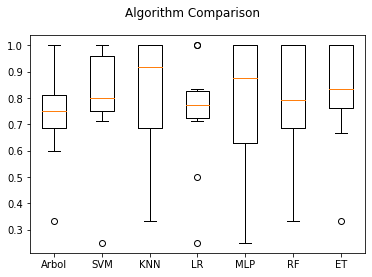

In [62]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.622619 (0.119884)
SVM: 0.711905 (0.198406)
KNN: 0.705952 (0.188686)
LR: 0.699405 (0.183218)
MLP: 0.571429 (0.232737)
RF: 0.672619 (0.189001)
ET: 0.720238 (0.130437)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943915, p:0.003526
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.734452, p:0.623720
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

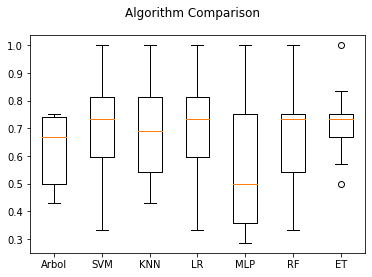

In [63]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.715455 (0.128697)
SVM: 0.773636 (0.126586)
KNN: 0.783636 (0.140707)
LR: 0.753636 (0.112113)
MLP: 0.693636 (0.159392)
RF: 0.744545 (0.133389)
ET: 0.782727 (0.118003)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943531, p:0.003373
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.246539, p:0.958962
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

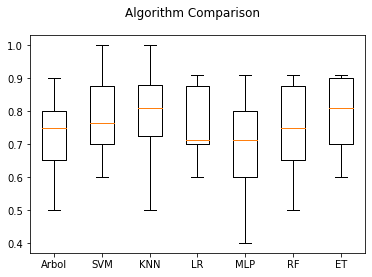

In [64]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [65]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [66]:
reducer = UMAP(n_components=10)

In [67]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.662024 (0.163038)
SVM: 0.701726 (0.128518)
KNN: 0.735060 (0.145272)
LR: 0.728393 (0.119298)
MLP: 0.685060 (0.119292)
RF: 0.693393 (0.147588)
ET: 0.716310 (0.136777)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.930053, p:0.000750
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.346458, p:0.909379
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

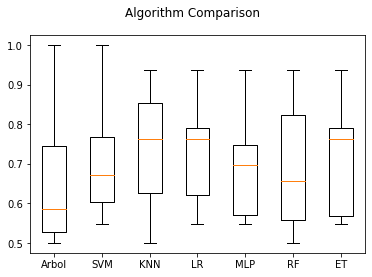

In [68]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.653571 (0.247636)
SVM: 0.685000 (0.156249)
KNN: 0.717381 (0.166084)
LR: 0.724048 (0.182656)
MLP: 0.691667 (0.182460)
RF: 0.690000 (0.226471)
ET: 0.689048 (0.185935)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.897657, p:0.000031
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.668091, p:0.675640
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

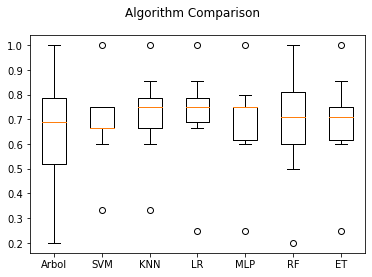

In [69]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.647619 (0.232689)
SVM: 0.695238 (0.154138)
KNN: 0.711905 (0.190833)
LR: 0.691071 (0.155412)
MLP: 0.649405 (0.188578)
RF: 0.685119 (0.167186)
ET: 0.699405 (0.174989)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.937559, p:0.001707
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.651132, p:0.688999
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

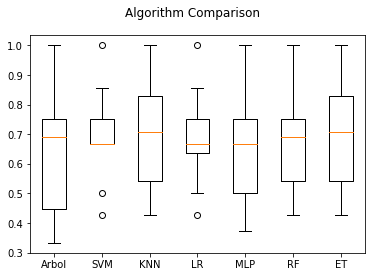

In [70]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.652727 (0.151128)
SVM: 0.725455 (0.130972)
KNN: 0.734545 (0.139941)
LR: 0.723636 (0.117846)
MLP: 0.675455 (0.130988)
RF: 0.686364 (0.150330)
ET: 0.716364 (0.132353)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.924663, p:0.000425
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.174025, p:0.982899
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

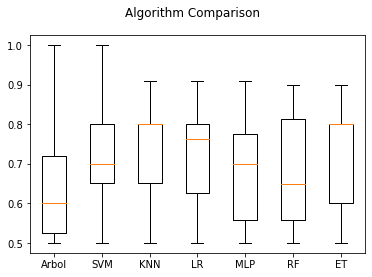

In [71]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# Isomap

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.549345 (0.132027)
SVM: 0.546250 (0.149564)
KNN: 0.604881 (0.154600)
LR: 0.612619 (0.164375)
MLP: 0.557560 (0.161755)
RF: 0.505179 (0.137231)
ET: 0.616786 (0.127346)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.977270, p:0.232610
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.371588, p:0.894340
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

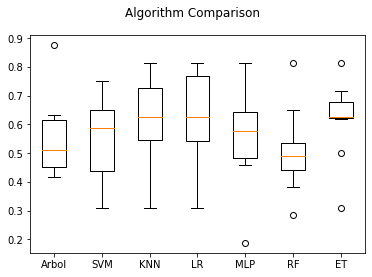

In [72]:
from sklearn import manifold
clf = manifold.Isomap(10, n_components=2)
X_iso2 = clf.fit_transform(X)
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='auroc')
!mv temp.csv tempiso2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.533333 (0.167498)
SVM: 0.558810 (0.309698)
KNN: 0.583095 (0.225418)
LR: 0.617857 (0.233650)
MLP: 0.575714 (0.199673)
RF: 0.500476 (0.200718)
ET: 0.604167 (0.241501)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.958160, p:0.019837
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.593055, p:0.734671
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

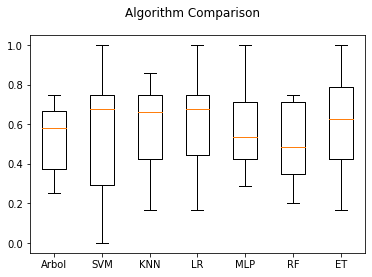

In [73]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.548214 (0.216104)
SVM: 0.463095 (0.256019)
KNN: 0.692857 (0.210064)
LR: 0.625000 (0.214038)
MLP: 0.564881 (0.194825)
RF: 0.479167 (0.197369)
ET: 0.633333 (0.220273)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.927735, p:0.000586
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.207554, p:0.973187
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

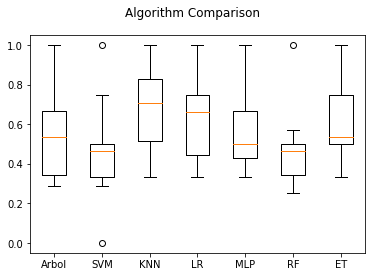

In [74]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.528182 (0.119465)
SVM: 0.539091 (0.116353)
KNN: 0.599091 (0.131328)
LR: 0.616364 (0.139586)
MLP: 0.546364 (0.125997)
RF: 0.508182 (0.094864)
ET: 0.568182 (0.102065)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.953999, p:0.011807
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.409698, p:0.869924
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

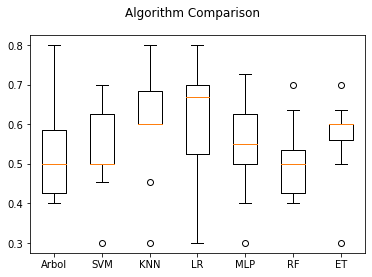

In [75]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.556905 (0.146023)
SVM: 0.608036 (0.153532)
KNN: 0.606012 (0.105257)
LR: 0.653333 (0.127707)
MLP: 0.665357 (0.098610)
RF: 0.648631 (0.099593)
ET: 0.709821 (0.087383)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.977524, p:0.240143
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.503753, p:0.803222
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

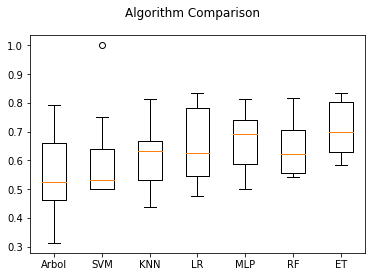

In [76]:
clf = manifold.Isomap(10, n_components=10)
X_iso10 = clf.fit_transform(X)
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.590000 (0.287054)
SVM: 0.293056 (0.379777)
KNN: 0.579802 (0.149757)
LR: 0.708333 (0.241479)
MLP: 0.649524 (0.218677)
RF: 0.616905 (0.183072)
ET: 0.713333 (0.214580)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.937659, p:0.001726
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.902543, p:0.498887
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

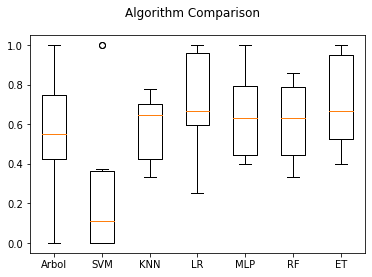

In [77]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.432143 (0.213228)
SVM: 0.450000 (0.471699)
KNN: 0.737500 (0.211229)
LR: 0.620833 (0.196231)
MLP: 0.689286 (0.184001)
RF: 0.675000 (0.183275)
ET: 0.664881 (0.167600)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.918147, p:0.000219
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 5.138761, p:0.000236
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

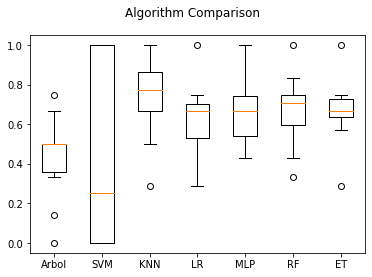

In [78]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.559091 (0.146882)
SVM: 0.470909 (0.235726)
KNN: 0.617273 (0.094690)
LR: 0.655455 (0.147567)
MLP: 0.635455 (0.092928)
RF: 0.645455 (0.093949)
ET: 0.673636 (0.095385)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.966712, p:0.059388
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.416393, p:0.222437
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

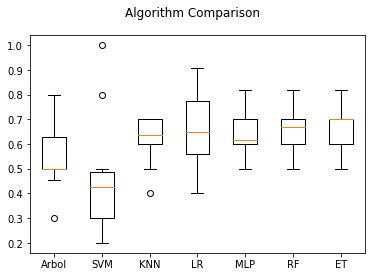

In [79]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# LLE

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.545774 (0.145017)
SVM: 0.593393 (0.144735)
KNN: 0.628393 (0.126087)
LR: 0.551607 (0.158907)
MLP: 0.576607 (0.125683)
RF: 0.603393 (0.156628)
ET: 0.629583 (0.110782)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.940440, p:0.002363
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.218628, p:0.969462
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

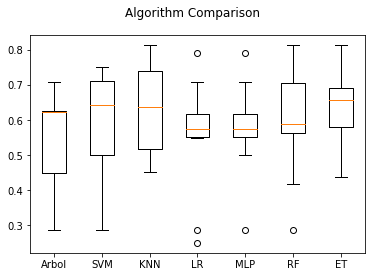

In [80]:
clf = manifold.LocallyLinearEmbedding(10, n_components=2,method='standard')
X_lle2 = clf.fit_transform(X)
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.526190 (0.226621)
SVM: 0.553690 (0.146902)
KNN: 0.596667 (0.154157)
LR: 0.567143 (0.181970)
MLP: 0.580476 (0.193306)
RF: 0.582143 (0.126102)
ET: 0.604167 (0.147914)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.956338, p:0.015783
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.390384, p:0.882525
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

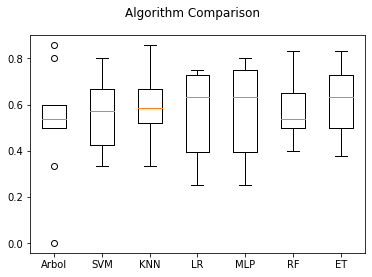

In [81]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.539286 (0.220868)
SVM: 0.873810 (0.165660)
KNN: 0.701190 (0.200372)
LR: 0.609524 (0.148671)
MLP: 0.609524 (0.148671)
RF: 0.663690 (0.229383)
ET: 0.666071 (0.217118)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.942458, p:0.002979
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.362986, p:0.899590
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

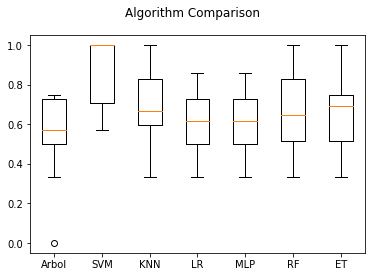

In [82]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.580000 (0.118377)
SVM: 0.617273 (0.112334)
KNN: 0.619091 (0.105974)
LR: 0.579091 (0.123117)
MLP: 0.589091 (0.111696)
RF: 0.607273 (0.117747)
ET: 0.599091 (0.097950)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.916212, p:0.000180
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.130545, p:0.991996
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

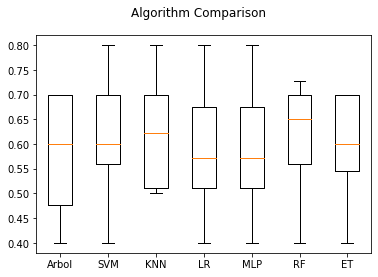

In [83]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [18]:
from sklearn import manifold
clf = manifold.LocallyLinearEmbedding(10, n_components=10,method='standard')
X_lle10 = clf.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.640000 (0.181795)
SVM: 0.702500 (0.150880)
KNN: 0.676548 (0.092511)
LR: 0.689524 (0.132199)
MLP: 0.727024 (0.200807)
RF: 0.695357 (0.133421)
ET: 0.756667 (0.119506)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.970084, p:0.092151
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.657079, p:0.684313
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

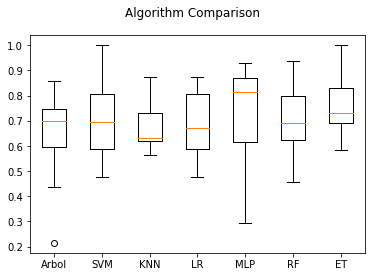

In [84]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='auroc')c

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.617500 (0.270454)
SVM: 0.702381 (0.225751)
KNN: 0.631071 (0.216760)
LR: 0.664762 (0.215641)
MLP: 0.664762 (0.228037)
RF: 0.657857 (0.181924)
ET: 0.686667 (0.192180)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957903, p:0.019205
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.237564, p:0.962510
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

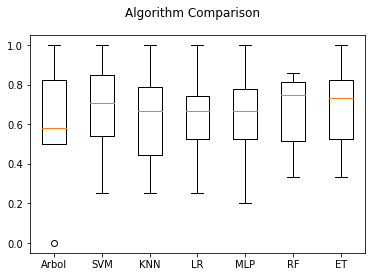

In [85]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.610119 (0.240276)
SVM: 0.660119 (0.217803)
KNN: 0.714286 (0.142758)
LR: 0.645833 (0.208915)
MLP: 0.751786 (0.275050)
RF: 0.714286 (0.246115)
ET: 0.795238 (0.186019)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.934124, p:0.001166
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.468966, p:0.828773
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

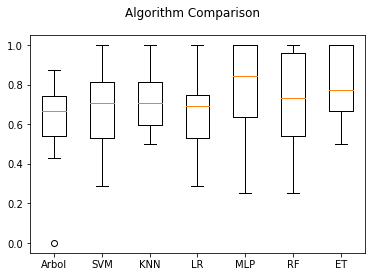

In [86]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.684545 (0.149105)
SVM: 0.701818 (0.156184)
KNN: 0.667273 (0.075755)
LR: 0.674545 (0.121750)
MLP: 0.685455 (0.189571)
RF: 0.682727 (0.120292)
ET: 0.733636 (0.121087)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.935459, p:0.001351
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.662969, p:0.679673
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

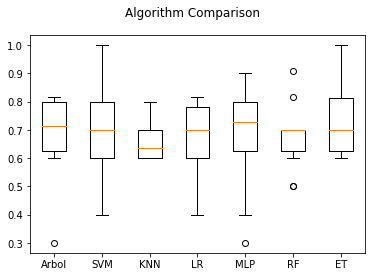

In [87]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [19]:
clf = manifold.LocallyLinearEmbedding(10, n_components=100,method='standard')
X_lle100 = clf.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.473750 (0.119350)
SVM: 0.500119 (0.045427)
KNN: 0.488988 (0.105241)
LR: 0.506369 (0.049129)
MLP: 0.494583 (0.119548)
RF: 0.581071 (0.165905)
ET: 0.529107 (0.102555)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.959797, p:0.024399
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.537575, p:0.180624
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

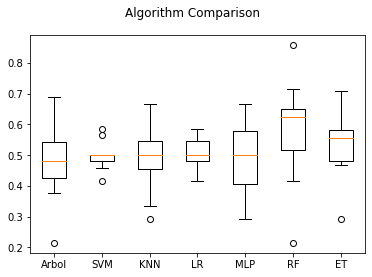

In [88]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.389762 (0.183120)
SVM: 0.391111 (0.262269)
KNN: 0.280952 (0.326251)
LR: 0.346162 (0.227043)
MLP: 0.238889 (0.246719)
RF: 0.587222 (0.243636)
ET: 0.583333 (0.308851)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.934537, p:0.001220
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.605649, p:0.724799
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

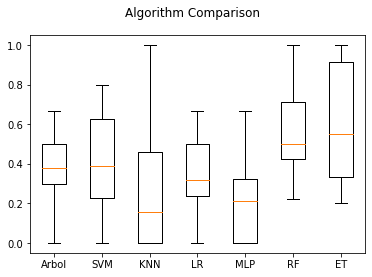

In [20]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.426190 (0.272450)
SVM: 0.528571 (0.409468)
KNN: 0.239286 (0.237884)
LR: 0.478571 (0.378182)
MLP: 0.408333 (0.391667)
RF: 0.585714 (0.248453)
ET: 0.438690 (0.290852)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.899564, p:0.000037
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.540728, p:0.179637
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

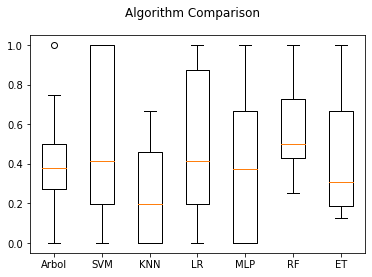

In [21]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.438182 (0.110655)
SVM: 0.457273 (0.180406)
KNN: 0.412727 (0.154128)
LR: 0.371818 (0.118073)
MLP: 0.378182 (0.170957)
RF: 0.517273 (0.156271)
ET: 0.430000 (0.136063)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939241, p:0.002063
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.245660, p:0.959317
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

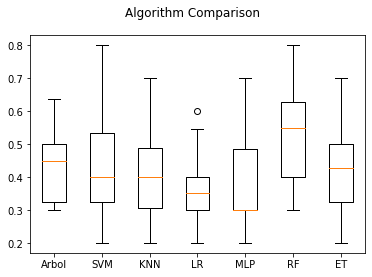

In [22]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# MDS

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.527798 (0.162410)
SVM: 0.385298 (0.157141)
KNN: 0.397500 (0.174789)
LR: 0.514643 (0.119534)
MLP: 0.447143 (0.108029)
RF: 0.591310 (0.167884)
ET: 0.490833 (0.167994)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.986955, p:0.683437
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.376456, p:0.891325
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are fulfilled
-

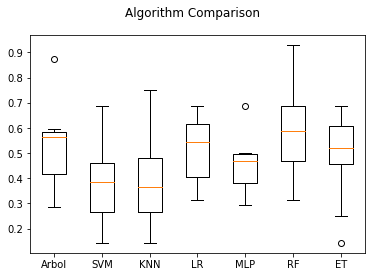

In [23]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds2 = clf.fit_transform(X)
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.523810 (0.203985)
SVM: 0.378095 (0.219512)
KNN: 0.391190 (0.204202)
LR: 0.496905 (0.276383)
MLP: 0.338571 (0.214682)
RF: 0.561429 (0.232108)
ET: 0.471429 (0.248679)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.966982, p:0.061514
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.415321, p:0.866173
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

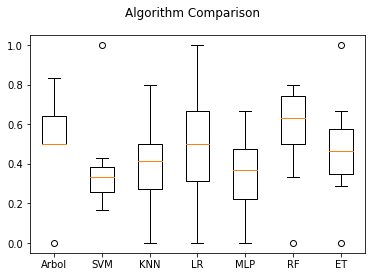

In [24]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.456548 (0.263362)
SVM: 0.397024 (0.158025)
KNN: 0.448810 (0.261474)
LR: 0.421429 (0.264125)
MLP: 0.379762 (0.336989)
RF: 0.632738 (0.281643)
ET: 0.511310 (0.275492)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938730, p:0.001947
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.307351, p:0.930862
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

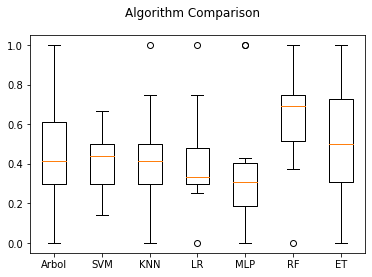

In [25]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.569091 (0.132814)
SVM: 0.362727 (0.125997)
KNN: 0.392727 (0.134950)
LR: 0.471818 (0.079195)
MLP: 0.400909 (0.087145)
RF: 0.590000 (0.131580)
ET: 0.451818 (0.103656)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.949195, p:0.006581
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.407357, p:0.871474
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

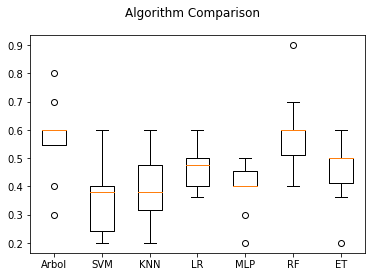

In [26]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.652381 (0.091052)
SVM: 0.570893 (0.137228)
KNN: 0.618571 (0.131135)
LR: 0.608155 (0.112661)
MLP: 0.562440 (0.180572)
RF: 0.562917 (0.122096)
ET: 0.555595 (0.193674)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.960377, p:0.026267
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.725793, p:0.630445
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

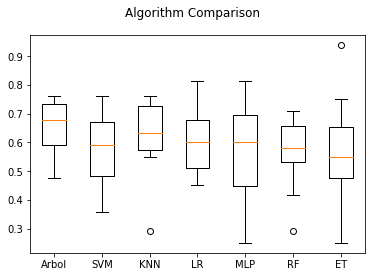

In [27]:
clf = manifold.MDS(n_components=10, n_init=1, max_iter=100)
X_mds10 = clf.fit_transform(X)
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.636548 (0.212549)
SVM: 0.601071 (0.241511)
KNN: 0.678333 (0.250228)
LR: 0.615238 (0.281229)
MLP: 0.609762 (0.222148)
RF: 0.550952 (0.250168)
ET: 0.550238 (0.329539)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.932472, p:0.000974
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.547401, p:0.770122
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

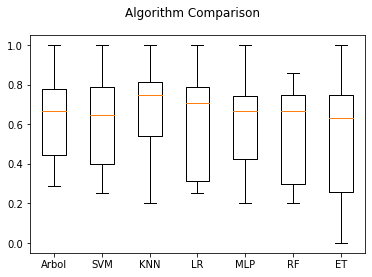

In [28]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.698214 (0.223639)
SVM: 0.574405 (0.185639)
KNN: 0.508929 (0.208304)
LR: 0.545833 (0.183890)
MLP: 0.541667 (0.223559)
RF: 0.545238 (0.244602)
ET: 0.464881 (0.275055)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.931075, p:0.000837
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.406533, p:0.872019
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

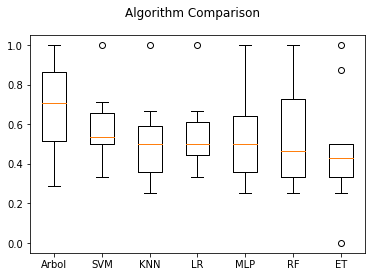

In [29]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.626364 (0.126716)
SVM: 0.580909 (0.128530)
KNN: 0.606364 (0.143915)
LR: 0.588182 (0.096385)
MLP: 0.578182 (0.152511)
RF: 0.570000 (0.128504)
ET: 0.540909 (0.171443)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.953308, p:0.010845
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.234284, p:0.963767
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

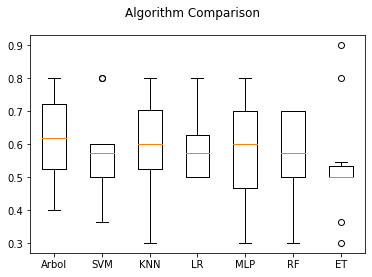

In [30]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.552500 (0.157937)
SVM: 0.717381 (0.093909)
KNN: 0.652798 (0.117547)
LR: 0.691786 (0.123753)
MLP: 0.635238 (0.162814)
RF: 0.713690 (0.178486)
ET: 0.721429 (0.088641)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.952330, p:0.009620
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.629297, p:0.153828
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

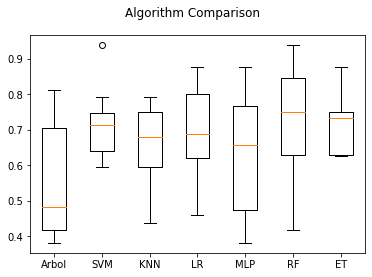

In [31]:
clf = manifold.MDS(n_components=100, n_init=1, max_iter=100)
X_mds100 = clf.fit_transform(X)
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.514167 (0.201041)
SVM: 0.733571 (0.229753)
KNN: 0.665000 (0.194000)
LR: 0.701190 (0.205302)
MLP: 0.649881 (0.241074)
RF: 0.723333 (0.257682)
ET: 0.735476 (0.236831)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.929497, p:0.000707
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.437120, p:0.851311
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

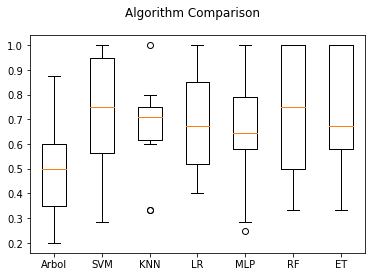

In [32]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.569643 (0.254635)
SVM: 0.635714 (0.225072)
KNN: 0.573214 (0.148787)
LR: 0.695238 (0.238939)
MLP: 0.666667 (0.252033)
RF: 0.658333 (0.261040)
ET: 0.671429 (0.297009)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.928675, p:0.000648
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.250897, p:0.292988
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

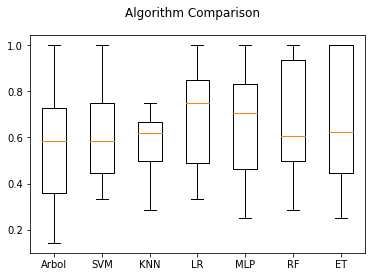

In [33]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.538182 (0.167075)
SVM: 0.663636 (0.114560)
KNN: 0.638182 (0.137739)
LR: 0.694545 (0.115937)
MLP: 0.633636 (0.146251)
RF: 0.653636 (0.176909)
ET: 0.634545 (0.123235)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.946856, p:0.004980
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.908060, p:0.495026
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

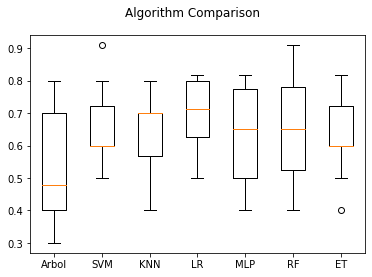

In [34]:
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='accuracy')